# Sagehen Data Exploration
***

__Library Imports & Initial Setup__

In [1]:
import pandas as pd
% matplotlib inline
# import seaborn; seaborn.set()


import sagehen_pandas

__Read in data from CSV using Pandas__

In [2]:
sage_df = pd.read_csv("SAGEHEN_1APR1997-14DEC2017.csv")
sage_df.tail()

,DATE,HOUR OF DAY ENDING AT L.S.T,TOTAL SOLAR RAD (K W-hr/m^2),AVE WIND SPEED (m/s),V. WIND DIR (Deg),MAX WIND SPEED (m/s),AIR TEMP AVE (Deg C),AIR TEMP MAX (Deg C),AIR TEMP MIN (Deg C),SOIL TEMP AVE (Deg C),SOIL TEMP MAX (Deg C),SOIL TEMP MIN (Deg C),RELATIVE HUMIDITY AVE (%),RELATIVE HUMIDITY MAX (%),RELATIVE HUMIDITY MIN (%),DEW PT. (Deg C),WET BULB (Deg C),BARO. PRESS. (mb),SNOW DEPTH (mm),TOTAL PRECIP (mm)
181507,2017-12-14,20:00,0.00,0.2,262,0.7,-4.1,-3.6,-4.6,NAN,NAN,NAN,86,87,85,-5.8,-4.8,841,114.40,NAN
181508,2017-12-14,21:00,0.00,0.2,257,0.7,-4.8,-4.5,-5.2,NAN,NAN,NAN,87,87,86,-6.5,-5.5,841,298.80,NAN
181509,2017-12-14,22:00,0.00,0.3,258,0.8,-5.6,-5.2,-6.0,NAN,NAN,NAN,87,88,87,-7.1,-6.1,841,-39.84,NAN
181510,2017-12-14,23:00,0.00,0.3,264,0.8,-6.4,-6.0,-6.9,NAN,NAN,NAN,89,89,88,-7.8,-6.9,842,-39.90,NAN
181511,2017-12-14,00:00,0.00,0.3,265,0.8,-7.2,-6.8,-7.6,NAN,NAN,NAN,90,90,89,-8.4,-7.6,841,38.59,NAN


__Rename columns to shorter names__

In [3]:
sage_df = sage_df.rename(
    columns={
        "DATE": 'date',
        "HOUR OF DAY ENDING AT L.S.T": "hour",
        "TOTAL SOLAR RAD (K W-hr/m^2)": "solar_rad",
        "AVE WIND SPEED (m/s)": "wind_ave",
        "V. WIND DIR (Deg)": "wind_dir",
        "MAX WIND SPEED (m/s)": "wind_max",
        "AIR TEMP AVE (Deg C)": "temp_ave",
        "AIR TEMP MAX (Deg C)": "temp_max",
        "AIR TEMP MIN (Deg C)": "temp_min",
        "SOIL TEMP AVE (Deg C)": "soil_tave",
        "SOIL TEMP MAX (Deg C)": "soil_tmax",
        "SOIL TEMP MIN (Deg C)": "soil_tmin",
        "RELATIVE HUMIDITY AVE (%)": "rh_ave",
        "RELATIVE HUMIDITY MAX (%)": "rh_max",
        "RELATIVE HUMIDITY MIN (%)": "rh_min",
        "DEW PT. (Deg C)": "dew_pt",
        "WET BULB (Deg C)": "wet_bulb",
        "BARO. PRESS. (mb)": "pressure",
        "SNOW DEPTH (mm)": "snow",
        "TOTAL PRECIP (mm)": "precip"
    }
)

__Add 'hour' column to 'date' column and change 'date' column to a datetime column type.__

In [4]:
sage_df['date'] = sage_df['date'] + " " + sage_df['hour']
sage_df['date_time'] = pd.to_datetime(sage_df['date'], errors="coerce")

__Remove hour column and Set index column to the 'date' column__

In [5]:
sage_df.drop('hour',axis=1,inplace=True)
sage_df.drop('date',axis=1,inplace=True)

In [6]:
sage_df = sage_df.set_index('date_time');

__Change all values to Numbers instead of Strings__

In [7]:
sage_df = sage_df.apply(pd.to_numeric, args=('coerce',))

### Current Issues:
* Negative Snow values through all of 2010
* Outrageous numbers for precip in 2001, and 2002

***
## Daily Data
* Average hourly data of each column
* Drop the following columns because they are best represneted as cumilative values rather than averaged values:
    * `solar_rad`, `snow`, `precip`
* Re-insert the dropped columns with their Summed values

In [8]:
daily_sage = sage_df.resample('D').mean()

dropped = ['solar_rad', 'snow', 'precip']
daily_sage.drop(dropped, axis=1, inplace=True)

solar_sum = sage_df['solar_rad'].resample('D').sum()
daily_sage.insert(loc=0, column='solar_rad', value=solar_sum)

snow_sum = sage_df['snow'].resample('D').sum()
daily_sage.insert(16, 'snow', snow_sum)

precip_sum = sage_df['precip'].resample('D').sum()
daily_sage.insert(17, 'precip', precip_sum)

In [9]:
daily_sage.tail()

,solar_rad,wind_ave,wind_dir,wind_max,temp_ave,temp_max,temp_min,soil_tave,soil_tmax,soil_tmin,rh_ave,rh_max,rh_min,dew_pt,wet_bulb,pressure,snow,precip
date_time,,,,,,,,,,,,,,,,,,
2017-12-10,2.27,0.383333,228.458333,1.204167,-5.633333,-4.645833,-6.716667,NaN,NaN,NaN,76.166667,79.916667,73.166667,-9.891667,-7.212500,843.583333,94.31,0.0
2017-12-11,2.14,0.441667,236.666667,1.087500,-6.104167,-5.145833,-7.100000,NaN,NaN,NaN,75.458333,79.041667,71.666667,-10.254167,-7.616667,844.083333,2014.69,0.0
2017-12-12,2.29,0.516667,227.916667,1.200000,-5.245833,-4.262500,-6.333333,NaN,NaN,NaN,76.375000,80.166667,73.208333,-9.445833,-6.862500,843.291667,20342.67,0.0
2017-12-13,2.18,0.458333,226.250000,1.233333,-4.620833,-3.583333,-5.675000,NaN,NaN,NaN,75.708333,79.666667,71.791667,-8.862500,-6.279167,840.541667,10940.65,0.0
2017-12-14,2.26,0.466667,226.916667,1.283333,-3.329167,-2.441667,-4.237500,NaN,NaN,NaN,75.166667,78.250000,72.041667,-7.904167,-5.112500,840.916667,5055.05,0.0


***
## Monthly Data

In [10]:
monthly_sage = sage_df.resample('M').mean()

dropped = ['solar_rad', 'snow', 'precip']
monthly_sage.drop(dropped, axis=1, inplace=True)

solar_sum = sage_df['solar_rad'].resample('M').sum()
monthly_sage.insert(loc=0, column='solar_rad', value=solar_sum)

snow_sum = sage_df['snow'].resample('M').sum()
monthly_sage.insert(16, 'snow', snow_sum)

precip_sum = sage_df['precip'].resample('M').sum()
monthly_sage.insert(17, 'precip', precip_sum)

__Create a multi-index with the year and month__

In [11]:
monthly_sage.set_index([monthly_sage.index.year, monthly_sage.index.month], inplace=True)
monthly_sage.index.names = ['year', 'month']

In [12]:
monthly_sage.tail()

solar_rad  wind_ave    wind_dir  wind_max   temp_ave   temp_max  \
year month                                                                    
2017 8         184.30  0.527151  218.706989  1.848522  15.404973  16.484946   
     9         138.11  0.565738  213.928969  2.011806   9.380919  10.386250   
     10        125.29  0.587097  214.005376  1.950806   3.917742   4.964919   
     11         47.99  0.821669  218.807384  3.078331   2.610754   3.261798   
     12         29.36  0.515179  226.380952  1.667262  -4.932440  -4.075595   

             temp_min  soil_tave  soil_tmax  soil_tmin     rh_ave     rh_max  \
year month                                                                     
2017 8      14.270161        NaN        NaN        NaN  61.577957  67.033602   
     9       8.322778        NaN        NaN        NaN  68.461003  72.952778   
     10      2.913038        NaN        NaN        NaN  64.091398  68.123656   
     11      1.969342        NaN        NaN        NaN  76.375602  79.836276   
     12     -5.835714        NaN        NaN        NaN  74.946429  78.586310   

               rh_min    dew_pt  wet_bulb    pressure       snow  precip  
year month                                                                
2017 8      56.760753  6.077285  9.955914  838.228495  -28836.47     0.0  
     9      63.836111  2.288301  5.605710  834.118384  -17978.23     0.0  
     10     60.194892 -4.015054  0.356452  837.721774  -25329.80     0.0  
     11     72.792937 -1.889567  0.590369  835.754414  -17977.75     0.0  
     12     71.505952 -9.336012 -6.576190  841.303571  243555.92     0.0

***
## Yearly Data

In [13]:
yearly_sage = sage_df.resample('Y').mean()

dropped = ['solar_rad', 'snow', 'precip']
yearly_sage.drop(dropped, axis=1, inplace=True)

solar_sum = sage_df['solar_rad'].resample('Y').sum()
yearly_sage.insert(loc=0, column='solar_rad', value=solar_sum)

snow_sum = sage_df['snow'].resample('Y').sum()
yearly_sage.insert(16, 'snow', snow_sum)

precip_sum = sage_df['precip'].resample('Y').sum()
yearly_sage.insert(17, 'precip', precip_sum)

In [14]:
yearly_sage.set_index(yearly_sage.index.year, inplace=True)
yearly_sage.index.name = 'year'

In [15]:
yearly_sage

,solar_rad,wind_ave,wind_dir,wind_max,temp_ave,temp_max,temp_min,soil_tave,soil_tmax,soil_tmin,rh_ave,rh_max,rh_min,dew_pt,wet_bulb,pressure,snow,precip
year,,,,,,,,,,,,,,,,,,
1997,1187.72,0.502167,207.713160,NaN,8.449024,NaN,NaN,NaN,NaN,NaN,64.709937,NaN,NaN,0.549812,4.337189,1026.584244,0.000000e+00,81.74
1998,1291.08,0.454783,199.640183,NaN,4.246872,NaN,NaN,NaN,NaN,NaN,75.837215,NaN,NaN,-0.804041,1.688253,1024.133219,0.000000e+00,539.70
1999,1427.96,0.508276,222.928881,NaN,4.772717,NaN,NaN,NaN,NaN,NaN,69.720091,NaN,NaN,-1.787842,1.529281,1025.986073,0.000000e+00,320.06
2000,1457.53,0.466598,217.449567,1.593369,5.054582,6.284054,5.045798,NaN,NaN,NaN,82.757058,89.683756,85.015775,-0.570781,2.735750,1024.612179,0.000000e+00,233.14
2001,1372.83,0.478478,221.941445,1.900012,5.184565,6.209558,4.172412,NaN,NaN,NaN,61.251653,65.971387,56.937966,-3.960990,-2.632213,1024.890946,6.595795e+06,44763.93
2002,1513.04,0.504027,221.500355,1.919139,4.729739,5.864531,3.627229,0.451014,18.081468,86.117348,61.238631,66.038421,56.869370,-3.977118,0.665103,1026.087755,2.217384e+07,47324.61
2003,1701.16,0.666663,209.592975,2.549624,5.350243,6.467261,4.249053,7.091675,7.237740,6.873889,66.341031,71.696407,61.617019,-2.048371,1.741004,1026.131138,3.603475e+07,898.15
2004,1820.78,0.682346,213.914402,2.588848,4.951278,6.094753,3.825142,6.747362,6.858723,6.612176,65.249245,70.430196,60.773819,-2.697025,1.236416,1026.354007,3.756910e+07,0.00
2005,1346.98,0.634950,209.661988,2.460303,5.110052,6.171477,4.086687,6.800369,6.919601,6.678176,70.377286,75.257612,65.981023,-1.268510,1.898525,1026.432582,3.012593e+07,0.00


Text(0,0.5,'Precip. mm')

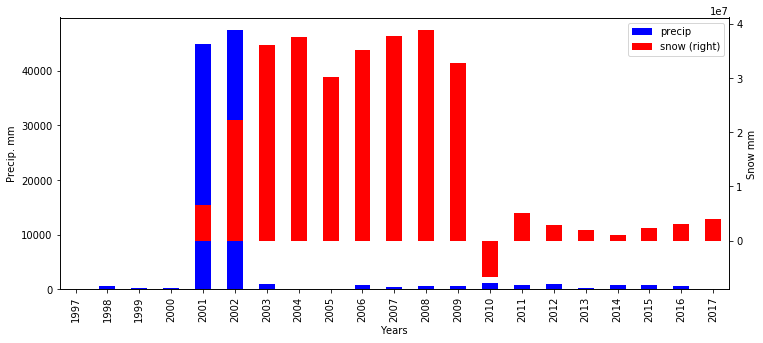

In [16]:
ax = yearly_sage['precip'].plot(
    kind='bar', legend=True, figsize=(12,5),
    xticks=yearly_sage.index, colormap='winter'
)
ax2 = yearly_sage['snow'].plot(
    kind='bar', secondary_y=True, legend=True,
    colormap='autumn',
)
ax2.set_ylabel("Snow mm")
ax.set_xlabel("Years")
ax.set_ylabel("Precip. mm")

In [17]:
twenty_ten = sagehen_pandas.year_search(2010,2010)
# twenty_ten.set_index(['date_time'], inplace=True)
# twenty_ten.drop('id', axis=1, inplace=True)
# twenty_ten = twenty_ten.apply(pd.to_numeric, args=('coerce',))

In [18]:
twenty_ten.head()

,solar_rad,wind_ave,wind_dir,wind_max,temp_ave,temp_max,temp_min,soil_tave,soil_tmax,soil_tmin,rh_ave,rh_max,rh_min,dew_pt,wet_bulb,pressure,snow,precip
date_time,,,,,,,,,,,,,,,,,,
2010-01-01 01:00:00,0.0,1.4,296.0,5.7,0.2,0.4,-0.0,NaN,NaN,NaN,73.0,74.0,71.0,-4.1,-1.6,840.0,-1459.23,0.0
2010-01-01 02:00:00,0.0,1.3,308.0,4.8,0.3,0.5,0.1,NaN,NaN,NaN,73.0,75.0,72.0,-4.0,-1.5,840.0,-1447.72,0.0
2010-01-01 03:00:00,0.0,1.0,18.0,3.7,0.4,0.8,0.2,NaN,NaN,NaN,75.0,76.0,73.0,-3.5,-1.2,839.0,-1439.93,0.0
2010-01-01 04:00:00,0.0,1.0,190.0,3.3,0.9,1.3,0.6,NaN,NaN,NaN,76.0,76.0,74.0,-3.0,-0.8,839.0,-1450.97,0.0
2010-01-01 05:00:00,0.0,0.9,153.0,4.1,1.5,1.7,1.3,NaN,NaN,NaN,76.0,77.0,74.0,-2.3,-0.1,839.0,-1422.53,0.0


In [19]:
dates = sagehen_pandas.date_search('2010-01-01', '2010-12-31')

In [20]:
dates.head()

,solar_rad,wind_ave,wind_dir,wind_max,temp_ave,temp_max,temp_min,soil_tave,soil_tmax,soil_tmin,rh_ave,rh_max,rh_min,dew_pt,wet_bulb,pressure,snow,precip
date_time,,,,,,,,,,,,,,,,,,
2010-01-01 01:00:00,0.0,1.4,296.0,5.7,0.2,0.4,-0.0,NaN,NaN,NaN,73.0,74.0,71.0,-4.1,-1.6,840.0,-1459.23,0.0
2010-01-01 02:00:00,0.0,1.3,308.0,4.8,0.3,0.5,0.1,NaN,NaN,NaN,73.0,75.0,72.0,-4.0,-1.5,840.0,-1447.72,0.0
2010-01-01 03:00:00,0.0,1.0,18.0,3.7,0.4,0.8,0.2,NaN,NaN,NaN,75.0,76.0,73.0,-3.5,-1.2,839.0,-1439.93,0.0
2010-01-01 04:00:00,0.0,1.0,190.0,3.3,0.9,1.3,0.6,NaN,NaN,NaN,76.0,76.0,74.0,-3.0,-0.8,839.0,-1450.97,0.0
2010-01-01 05:00:00,0.0,0.9,153.0,4.1,1.5,1.7,1.3,NaN,NaN,NaN,76.0,77.0,74.0,-2.3,-0.1,839.0,-1422.53,0.0
